In [3]:
import pandas as pd

In [10]:
# PEEK TO SEE WHAT'S IN IT
data = pd.read_csv('ridership.csv')
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
filtered_data = data[data['Date'].dt.year == 2015]
print(filtered_data)


Empty DataFrame
Columns: [Date, Ridership]
Index: []


In [3]:
# AGGREGATE TO MONTHS, OUTPUT NEW FILE

data = pd.read_csv('ridership.csv')
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
monthly_data = data.groupby(data['Date'].dt.to_period('M'))['Ridership'].sum().reset_index()
monthly_data.to_csv('ridership_months.csv', index=False)

In [5]:
# FIND THE LOWEST DATE SO WE CAN CUT THE CRIME DATASET DOWN

data = pd.read_csv('ridership_months.csv')
data['Date'] = pd.to_datetime(data['Date'])
min_date = data['Date'].min()
print(min_date)

2016-01-01 00:00:00


In [8]:
# FIND THE HIGHEST DATE SO WE CAN CUT THE CRIME DATASET DOWN

data = pd.read_csv('ridership.csv')
data['month'] = pd.to_datetime(data['month'])
max_date = data['month'].max()
print(max_date)

2024-04-01 00:00:00


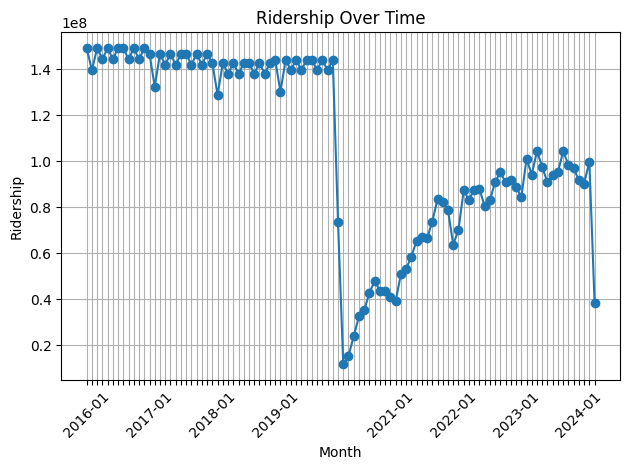

In [2]:
# SHITTY VISUALIZATION

import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
data = pd.read_csv('ridership.csv')

# Plotting
plt.plot(data['month'], data['ridership'], marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Ridership')
plt.title('Ridership Over Time')

# Customize x-axis ticks to include only January labels
january_ticks = [month if month.endswith('-01') else '' for month in data['month']]
plt.xticks(data['month'], january_ticks, rotation=45)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()
